In [50]:
import os
import re 
import random
import string      # for string operations    
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import wordnet
#nltk.download('punkt')

In [7]:
df = pd.read_csv("./Corona_NLP_train.csv", encoding="utf-8", encoding_errors="replace")
print(df.shape)
df.head(10)

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [8]:
df = df[["OriginalTweet", "Sentiment"]]
df.head(10)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,As news of the regions first confirmed COVID-...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [21]:
def color_sentiment(val):
    """
    Colors the sentiment column based on the
    sentiment."""
    
    if val == 'Extremely Positive':
        color = 'green'
    elif val == 'Positive':
        color = 'lightgreen'
    elif val == 'Negative':
        color = 'lightcoral'
    elif val == 'Extremely Negative':
        color = 'coral'
    else: # neutral
        color = 'lightblue'
    return f'background-color: {color}'

# Style the DataFrame
styled_df = df.head(20).style.map(color_sentiment, subset=['Sentiment'])
# Display the styled DataFrame
styled_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty... PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. Stay calm, stay safe. #COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak. Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage... #CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
5,"As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive
6,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
7,Was at the supermarket today. Didn't buy toilet paper. #Rebel #toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
8,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive
9,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative


In [25]:
def clean_sentiment_data(df):
    """
    Perform basic cleaning on sentiment analysis
    dataset
    """
    # Create a copy to avoid modifying original data
    cleaned_df = df.copy()
    
    # 1. Remove any duplicate rows
    cleaned_df = cleaned_df.drop_duplicates()
    
    # 2. Remove any rows with missing values
    cleaned_df = cleaned_df.dropna()
    
    # 3. Strip whitespace from text column
    cleaned_df['OriginalTweet'] = cleaned_df['OriginalTweet'].str.strip()
    
    # 4. Convert sentiment to lowercase for consistency
    cleaned_df['Sentiment'] = cleaned_df['Sentiment'].str.lower()
    
    # 5. Remove rows where text is empty after stripping
    cleaned_df = cleaned_df[cleaned_df['OriginalTweet'].str.len()>0]
    
    # 6. Reset index after cleaning
    cleaned_df = cleaned_df.reset_index(drop=True)
    
    return cleaned_df

In [26]:
cleaned_data = clean_sentiment_data(df)
display(cleaned_data.shape)
cleaned_data.head()

(41157, 2)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral
1,advice Talk to your neighbours family to excha...,positive
2,Coronavirus Australia: Woolworths to give elde...,positive
3,My food stock is not the only one which is emp...,positive
4,"Me, ready to go at supermarket during the #COV...",extremely negative


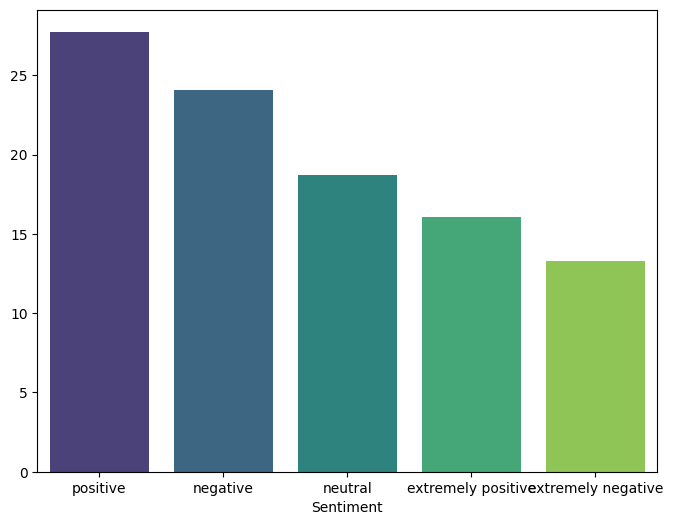

In [30]:
sentiment_counts = cleaned_data['Sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

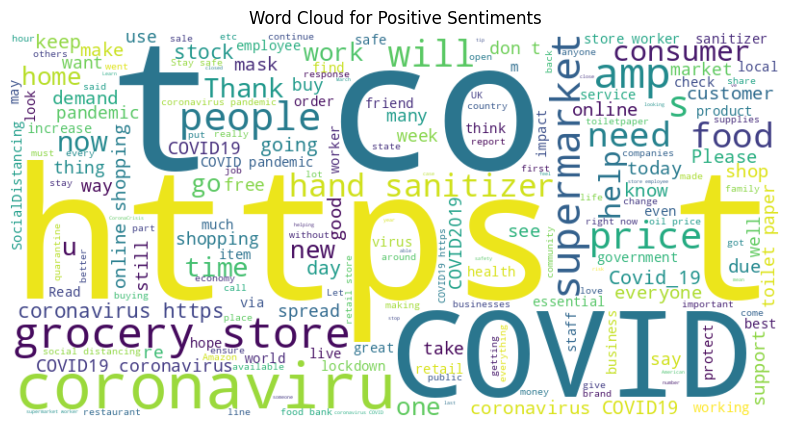

In [36]:
# Filter for positive sentiments
from wordcloud import WordCloud, STOPWORDS

positive_reviews = cleaned_data[cleaned_data['Sentiment'].isin(['extremely positive', 'positive'])]

# Combine all positive reviews into a single string
positive_text = " ".join(positive_reviews['OriginalTweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

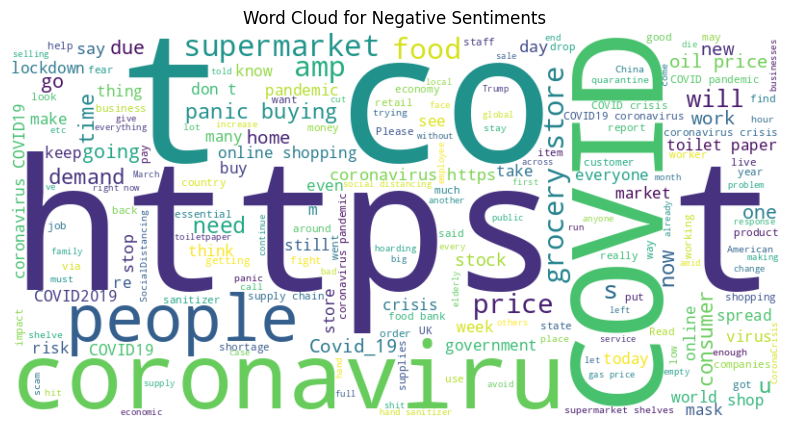

In [38]:
# Filter for negative sentiments
negative_reviews = cleaned_data[cleaned_data['Sentiment'].isin(['extremely negative', 'negative'])]

# Combine all negative reviews into a single string
negative_text = " ".join(negative_reviews['OriginalTweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

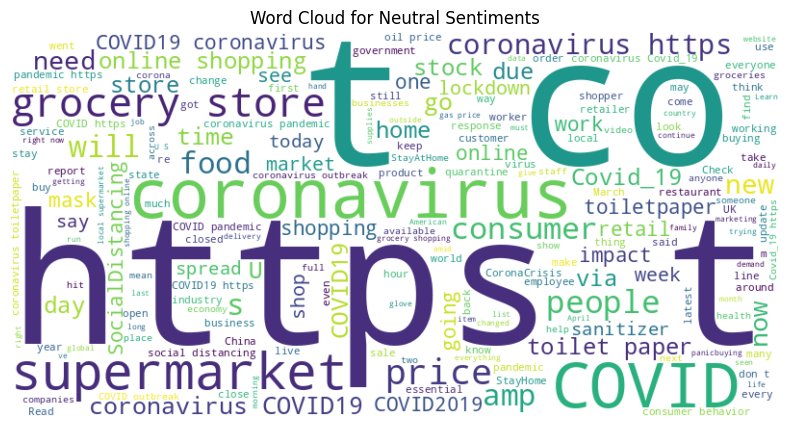

In [40]:
# Filter for neutral sentiments
neutral_reviews = cleaned_data[cleaned_data['Sentiment'] == 'neutral']

# Combine all neutral reviews into a single string
neutral_text = " ".join(neutral_reviews['OriginalTweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

In [42]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [44]:
def convert_to_lowercase(df, col):
    
    """Step 1: Convert text to lowercase
    
    1. Text Classification: Lowercasing helps models identify the same word
    regardless of its case, improving classification accuracy.
    2. Sentiment Analysis: Lowercasing ensures that sentiment-bearing words are
    treated consistently, leading to more accurate sentiment predictions.
    3. Machine Translation: Lowercasing simplifies the translation process by
    reducing the number of word variations that need to be considered.
    4. Information Retrieval: Lowercasing improves search accuracy by ensuring
    that queries and documents are compared consistently.
    5. Natural Language Understanding: Lowercasing aids in understanding the
    underlying meaning of text by focusing on the semantic content rather than
    superficial case variations
    
    
    """
    
    df['text_lower'] = df[col].str.lower()
    return df

df = convert_to_lowercase(cleaned_data, "OriginalTweet")
df.head()

,OriginalTweet,Sentiment,text_lower
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov..."


In [46]:
def remove_special_characters(df, col):
    
    """Step 2: Remove special characters and numbers
    
    1. Focus on meaningful words
    2. Noise Reduction
    3. Feature Dimensionality reduction
    4. Model consistency across different text corpus
    
    
    """
    
    
    df['text_clean'] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z\s]','', x))
    
    return df

df = remove_special_characters(df, 'text_lower')
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...


In [47]:
def remove_urls(df, col):
    """Step 3: Remove URLs
    
    1. Reduce noise
    2. Enhance Data consistency
    3. Feature Dimensionality reduction 
    4. Boost model perf.
    
    """
    
    df['text_no_urls'] = df[col].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
    
    return df


df = remove_urls(df, "text_clean")
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...


In [48]:
def remove_extra_whitespace(df):
    """Step 4: Remove extra whitespace
    
        1. Consistent representation
        2. Improved model perf.
        3. Efficient Processing
        4. Better Interpretability
    
    """
    
    df['text_stripped'] = df['text_no_urls'].apply(lambda x: ' '.join(x.split()))
    
    return df

df = remove_extra_whitespace(df)
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...


In [49]:
def tokenize_text(df, col):
    
    """Step 5: Tokenization
    
    1. Break down into menaingful units
    2. Enable Further NLP tasks
    3. Feature Engg
    4. Handle different languages
    
    
    """
    
    df['tokens'] = df[col].apply(word_tokenize)
    
    return df

df = tokenize_text(df, "text_stripped")
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and,"[menyrbie, philgahan, chrisitv, and, and]"
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,..."
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi..."
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,"[me, ready, to, go, at, supermarket, during, t..."


In [58]:
def remove_stopwords(df, col):
    
    """Step 6: Remove stopwords"""
    
    stop_words = set(stopwords.words('english'))
    df['tokens_no_stop'] = df[col].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    
    return df


df = remove_stopwords(df, "tokens")
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]"
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,..."
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ..."


In [60]:
def lemmatize_text(df, col):
    
    """Step 7: Lemmatization (after ensuring WordNet corpus is downloaded)

       1. Reduces vocabulary size
       2. Improves Accuracy: better, good convery similar meaning
       3. Allows lexicon matching


    """

    wordnet_path = os.path.join('corpora', 'wordnet') # Create the relative path to 'wordnet'
    
    if not any(os.path.exists(os.path.join(path, wordnet_path)) for path in nltk.data.path):
        print("WordNet corpus not found. Downloading...")
        nltk.download('wordnet')
        
    lemmatizer = WordNetLemmatizer()
    
    
    df['lemmatized'] = df[col].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return df


df = lemmatize_text(df, "tokens_no_stop")
df.head()

WordNet corpus not found. Downloading...


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]"
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,..."
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ...","[ready, go, supermarket, covid, outbreak, im, ..."


In [61]:
def join_tokens(df, col):
    
    """Step 8: Join tokens back to text"""
    
    df['processed_text'] = df[col].apply(lambda x: ' '.join(x))
    return df

df = join_tokens(df, "lemmatized")
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,processed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]",menyrbie philgahan chrisitv
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph...",advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde...",coronavirus australia woolworth give elderly d...
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,...",food stock one empty please dont panic enough ...
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ...","[ready, go, supermarket, covid, outbreak, im, ...",ready go supermarket covid outbreak im paranoi...


In [63]:
def encode_labels(df):
    
    """Step 9: Encode sentiment labels"""
    
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['Sentiment'])
    return df, le

df, label_encoder = encode_labels(df)
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,processed_text,sentiment_encoded
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]",menyrbie philgahan chrisitv,3
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph...",advice talk neighbour family exchange phone nu...,4
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde...",coronavirus australia woolworth give elderly d...,4
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,...",food stock one empty please dont panic enough ...,4
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ...","[ready, go, supermarket, covid, outbreak, im, ...",ready go supermarket covid outbreak im paranoi...,0


In [64]:
def create_tfidf(df, max_features=5000):
    
    """Step 10: TF-IDF Vectorization
    
    1. Transforms text to numerical vectors
    2. Handles word frequency bias by weighing down frequent words
    3. Feature Representation
    4. Useful in text classifciation, information retreival, clustering
    
    """
    
    tfidf = TfidfVectorizer(max_features=max_features)
    
    tfidf_matrix = tfidf.fit_transform(df['processed_text'])
    
    return tfidf_matrix, tfidf

tfidf_matrix, tfidf_vectorizer = create_tfidf(df)
df.head()

,OriginalTweet,Sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,processed_text,sentiment_encoded
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...,menyrbie philgahan chrisitv httpstcoifzfanpa a...,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]",menyrbie philgahan chrisitv,3
1,advice Talk to your neighbours family to excha...,positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph...",advice talk neighbour family exchange phone nu...,4
2,Coronavirus Australia: Woolworths to give elde...,positive,coronavirus australia: woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde...",coronavirus australia woolworth give elderly d...,4
3,My food stock is not the only one which is emp...,positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,...",food stock one empty please dont panic enough ...,4
4,"Me, ready to go at supermarket during the #COV...",extremely negative,"me, ready to go at supermarket during the #cov...",me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,me ready to go at supermarket during the covid...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ...","[ready, go, supermarket, covid, outbreak, im, ...",ready go supermarket covid outbreak im paranoi...,0


In [68]:
tfidf_matrix

<41157x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 606291 stored elements in Compressed Sparse Row format>

In [66]:
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [70]:
df.shape

(41157, 11)

In [121]:
def create_balanced_dataset(df, n_samples=5000):
    """
    Create a balanced dataset with specified number of samples
    """
    
    # Convert sentiment to numeric
    sentiment_map = {
        'extremely negative': 0,
        'negative':1,
        'neutral': 2,
        'positive': 3,
        'extremely positive':4 
        }
    df['label'] = df['Sentiment'].map(sentiment_map)
    
    # Calculate samples per class
    samples_per_class = n_samples // 5
    #print("samples per class: ", samples_per_class)
    
    # Get balanced data for each class
    balanced_dfs = []
    for label in range(5):
        #print(label)
        class_df = df[df['label'] == label]
        #print(label, len(class_df))
        if len(class_df) > samples_per_class:
            balanced_dfs.append(class_df.sample(n=samples_per_class, random_state=42))
        else:
        # If we don't have enough samples, oversample
            balanced_dfs.append(class_df.sample(n=samples_per_class, replace=True, random_state=42))
    
    # Combine balanced datasets
    balanced_df = pd.concat(balanced_dfs)
    
    # Shuffle the final dataset
    return balanced_df.sample(frac=1, random_state=42)

In [135]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer,RobertaForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

class SentimentDataset(Dataset):
    
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(text, add_special_tokens=True, max_length=self.max_len, 
                                          return_token_type_ids=False, padding='max_length', truncation=True,
                                          return_attention_mask=True, return_tensors='pt')
        return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': torch.tensor(label, dtype=torch.long)
        }

In [144]:
def train_sentiment_model(df, test_size=0.2, num_epochs=3, batch_size=16, learning_rate=2e-5):
    
    # Create balanced dataset
    print("Creating balanced dataset...")
    balanced_df = create_balanced_dataset(df, n_samples=5000)
    print(f"Class distribution:\n{balanced_df['label'].value_counts()}")
    
    # Split the data
    train_df, test_df = train_test_split(balanced_df, test_size=test_size, random_state=42, stratify=balanced_df['label'])
    
    # Get texts and labels
    train_texts = train_df['processed_text'].tolist()
    train_labels = train_df['label'].tolist()
    test_texts = test_df['processed_text'].tolist()
    test_labels = test_df['label'].tolist()
    
    # Initialize tokenizer
    print("Initializing RoBERTa tokenizer...")
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    
    # Create datasets
    train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
    test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)
    
    # Create dataloader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model
    print("Initializing RoBERTa model...")
    model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=5)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    # Set up optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    
    # Training loop
    print(f"Training on {device}")
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        
        # Training
        for batch_idx, batch in enumerate(train_loader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        if (batch_idx + 1) % 10 == 0:
            print(f"Batch {batch_idx + 1}/{len(train_loader)}, Loss:{loss.item():.4f}")
        
        
    # Evaluation
    model.eval()
    test_preds = []
    test_true = []
    
    print("\nEvaluating...")
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            
            test_preds.extend(preds)
            test_true.extend(labels.numpy())
            
            
    # Calculate metrics
    accuracy = accuracy_score(test_true, test_preds)
    print(f'Average training loss: {total_loss/len(train_loader):.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
    
    
    # Detailed classification report
    print('\nClassification Report:')
    print(classification_report(test_true, test_preds, 
                                target_names=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremeley Positive']))
    
    
    
    # Save the model
    print("\nSaving model...")
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'tokenizer': tokenizer
        }, 'roberta_sentiment_model_balanced.pth')
    
    
    return model, tokenizer

In [141]:
model, tokenizer = train_sentiment_model(df)

Creating balanced dataset...
Class distribution:
label
3    100
0    100
1    100
4    100
2    100
Name: count, dtype: int64
Initializing RoBERTa tokenizer...
Initializing RoBERTa model...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.9/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  scheduler_dict[param].step()


Training on cpu

Epoch 1/3

Epoch 2/3

Epoch 3/3

Evaluating...
Average training loss: 1.4438
Test Accuracy: 0.3100

Classification Report:
                     precision    recall  f1-score   support

 Extremely Negative       0.00      0.00      0.00        20
           Negative       0.23      0.45      0.31        20
            Neutral       0.32      0.60      0.41        20
           Positive       0.17      0.05      0.08        20
Extremeley Positive       0.53      0.45      0.49        20

           accuracy                           0.31       100
          macro avg       0.25      0.31      0.26       100
       weighted avg       0.25      0.31      0.26       100


Saving model...


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
def predict_sentiment(text, model, tokenizer, device):
    model.eval()
    encoding = tokenizer.encode_plus(text, add_special_tokens=True, max_length=128,
                                        return_token_type_ids=False, padding='max_length', truncation=True,
                                        return_attention_mask=True,return_tensors='pt')
    
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        pred = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
    
        # Get confidence scores
        probs = torch.nn.functional.softmax(outputs.logits, dim=1).cpu().numpy()[0]
    
    sentiment_map = {0: 'extremley negative', 1: 'negative', 2: 'neutral', 3: 'positive', 4 : 'extremely positive'}
    
    return sentiment_map[pred], probs[pred]

In [145]:
# Main execution
if __name__ == "__main__":
    
    # df is your input dataframe
    print("Starting training process...")
    %time model, tokenizer = train_sentiment_model(df)
    
    # Example prediction
    example_text = "The geosolutions technology will leverage benefon gps solutions"
    
    sentiment, confidence = predict_sentiment(example_text, model, tokenizer, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    
    print(f"\nExample prediction for: '{example_text}'")
    print(f"Predicted sentiment: {sentiment} (confidence: {confidence:.2f})")

Starting training process...
Creating balanced dataset...
Class distribution:
label
1    1000
2    1000
0    1000
3    1000
4    1000
Name: count, dtype: int64
Initializing RoBERTa tokenizer...
Initializing RoBERTa model...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.9/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  scheduler_dict[param].step()


Training on cpu

Epoch 1/3
Batch 250/250, Loss:1.2108

Epoch 2/3
Batch 250/250, Loss:0.6430

Epoch 3/3
Batch 250/250, Loss:0.3766

Evaluating...
Average training loss: 0.7870
Test Accuracy: 0.6160

Classification Report:
                     precision    recall  f1-score   support

 Extremely Negative       0.65      0.91      0.76       200
           Negative       0.45      0.42      0.44       200
            Neutral       0.89      0.55      0.68       200
           Positive       0.52      0.34      0.41       200
Extremeley Positive       0.62      0.86      0.72       200

           accuracy                           0.62      1000
          macro avg       0.63      0.62      0.60      1000
       weighted avg       0.63      0.62      0.60      1000


Saving model...
CPU times: user 6h 34min 56s, sys: 56min 39s, total: 7h 31min 36s
Wall time: 10h 4min 48s

Example prediction for: 'The geosolutions technology will leverage benefon gps solutions'
Predicted sentiment: positive